##  Birth-months advantage in sport.
Team member: Jimmy Wong, Oleksii Lavrenin, Nana Kweku Edusah

Github: https://github.com/olavrenin-data-scientist/Project2_Wong_Edusah_Lavrenin

Primary Dataset: https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-09/readme.md




## Data structure
1. NHL Player Birth Records (From NHL Rosters)
Observations: Over 7,000 rows, each representing a unique player-season entry across NHL team rosters.
 
Key Variables:
 
player_id  – A unique ID for each NHL player helps us to remove duplicates and identify distinct players.
 
birth_date – Full date of birth from which we detect the birth month variable used in the analysis.
 
birth_country – Country of birth.
 
position_type – Player’s general position.
 
team_code – NHL team abbreviation. We can track regional effects.
 
Most useful variables:
 
birth_date - for a fetching months from date of birth date.
 
birth_country - for detecting only Canadian native players.
 
player_id  - distinct players (without duplication of records).
 
position_type -  roles in the team.

 


2. Canadian Birth Records (Canada, 1991–2022)
Observations: 384 rows — one row for each month from 1991 to 2022 (32 years × 12 months)
 
Purpose: Define a baseline month of birth for the Canadian population.
 
Key Variables:
 
year - calendar year of birthday.
 
month  - calendar month of birthday.
 
births – number of birthdays in specific months.
 
Most useful variables:
 
month and aggregated births - help to detect total numbers for months and years.
 
These datasets help to understand the statistical months of birthdays for Canadian players vs the common Canadian population and detect the potential mismatch.


## Introduction
     The sports industry has a bias that many individuals born earlier sometimes have advantages in power and skillset. This is a unique phenomenon known as birth months advantage or relative effect (ARE). For example, in your league of ice hockey, this effect is very notable, when athletes were born In January and compete against kids born in late December. With this 11–12-month difference, older children are more skilled and stronger, and this impacts long-term success. This project researches and analyzes the birth-months advantage effect in the Canadian NHL league between hockey players. The research on this pattern is very important because the bias can potentially influence the selection of players by coaches and unequal training for players. Coaches, who believe in this bias can give more preference to players who were born in earlier months.


## Questions
1. Do we have a disproportion in the number of NHL players born in January and December?
2. What birth-month results NHL players vs the general Canadian population?
3. Do we have consistent or inconsistent effects where players were born before and after 2000?
4. Does the birth-month effect reflect on position?
5. How does the effect affect goaltenders vs defensemen?
6. Do some teams have more or fewer players in early months vs other teams?
7. Does this phenomenon exist only in hockey or in other sports too? Example: compare with additional dataset for football (NHL).

## Sanity checking
Before performing deeper analysis, we validate:
- Dates are parsed correctly and filtered
- Only Canadian-born players are included
- No duplicate players are counted
- Monthly distributions sum to 100%


## Load and Prepare Data

In [11]:
import pandas as pd

# Load datasets
canadian_births_df = pd.read_csv('data/canada_births_1991_2022.csv')
players_df = pd.read_csv('data/nhl_player_births.csv')
rosters_df = pd.read_csv('data/nhl_rosters.csv')
teams_df = pd.read_csv('data/nhl_teams.csv')


## Preprocess Player Data

In [14]:
# Convert birth_date to datetime
players_df['birth_date'] = pd.to_datetime(players_df['birth_date'], errors='coerce')
players_df = players_df.dropna(subset=['birth_date'])  # Drop rows with invalid dates

# Extract birth month and year
players_df['birth_month'] = players_df['birth_date'].dt.month
players_df['birth_year'] = players_df['birth_date'].dt.year

# Filter Canadian-born players
canadian_players = players_df[players_df['birth_country'] == 'CAN'].copy()


## Is there a January–December birth-month bias?

In [13]:
jan_pct_nhl = (canadian_players['birth_month'] == 1).mean() * 100
dec_pct_nhl = (canadian_players['birth_month'] == 12).mean() * 100

print(f"January % of Canadian NHL players: {jan_pct_nhl:.2f}%")
print(f"December % of Canadian NHL players: {dec_pct_nhl:.2f}%")


January % of Canadian NHL players: 9.93%
December % of Canadian NHL players: 6.58%


## Compare NHL player birth-month distribution to Canadian population

In [6]:
# Canadian birth month distribution
canadian_births_by_month = canadian_births_df.groupby('month')['births'].sum()
canadian_births_pct = canadian_births_by_month / canadian_births_by_month.sum() * 100

# NHL player birth month distribution
nhl_birth_month_counts = canadian_players['birth_month'].value_counts().sort_index()
nhl_birth_month_pct = nhl_birth_month_counts / nhl_birth_month_counts.sum() * 100

# Align both distributions
nhl_birth_month_pct = nhl_birth_month_pct.reindex(range(1, 13), fill_value=0)
canadian_births_pct = canadian_births_pct.reindex(range(1, 13), fill_value=0)

# Print side-by-side
comparison_df = pd.DataFrame({
    'Month': range(1, 13),
    'NHL Players (%)': nhl_birth_month_pct.values,
    'Canada Population (%)': canadian_births_pct.values
})
comparison_df


,Month,NHL Players (%),Canada Population (%)
0,1,9.930505,8.015265
1,2,9.747623,7.545096
2,3,9.381858,8.480224
3,4,9.619605,8.372814
4,5,9.528164,8.765969
5,6,8.467447,8.523528
6,7,7.991953,8.875414
7,8,7.187271,8.718995
8,9,7.699342,8.680416
9,10,7.022677,8.367415


### Visualization: NHL vs Canada Population by Birth Month

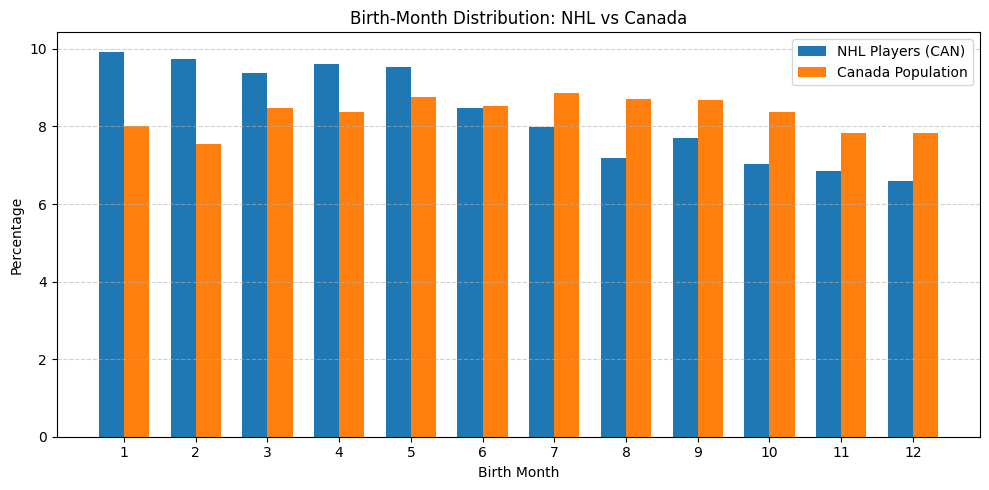

In [7]:
import matplotlib.pyplot as plt

months = range(1, 13)
bar_width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([m - bar_width/2 for m in months], nhl_birth_month_pct.values, width=bar_width, label='NHL Players (CAN)')
plt.bar([m + bar_width/2 for m in months], canadian_births_pct.values, width=bar_width, label='Canada Population')

plt.xlabel('Birth Month')
plt.ylabel('Percentage')
plt.title('Birth-Month Distribution: NHL vs Canada')
plt.xticks(months)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Has the birth-month advantage changed over time?

In [8]:
# Compare players born before and after 2000
pre_2000 = canadian_players[canadian_players['birth_year'] < 2000]
post_2000 = canadian_players[canadian_players['birth_year'] >= 2000]

pre_2000_pct = pre_2000['birth_month'].value_counts(normalize=True).sort_index() * 100
post_2000_pct = post_2000['birth_month'].value_counts(normalize=True).sort_index() * 100

pre_2000_pct = pre_2000_pct.reindex(range(1, 13), fill_value=0)
post_2000_pct = post_2000_pct.reindex(range(1, 13), fill_value=0)

pre_2000_pct, post_2000_pct


(birth_month
 1     9.767874
 2     9.693593
 3     9.340761
 4     9.637883
 5     9.526462
 6     8.486537
 7     8.022284
 8     7.223770
 9     7.706592
 10    7.056639
 11    6.889508
 12    6.648097
 Name: proportion, dtype: float64,
 birth_month
 1     20.481928
 2     13.253012
 3     12.048193
 4      8.433735
 5      9.638554
 6      7.228916
 7      6.024096
 8      4.819277
 9      7.228916
 10     4.819277
 11     3.614458
 12     2.409639
 Name: proportion, dtype: float64)

### Visualization: Pre-2000 vs Post-2000 NHL Players

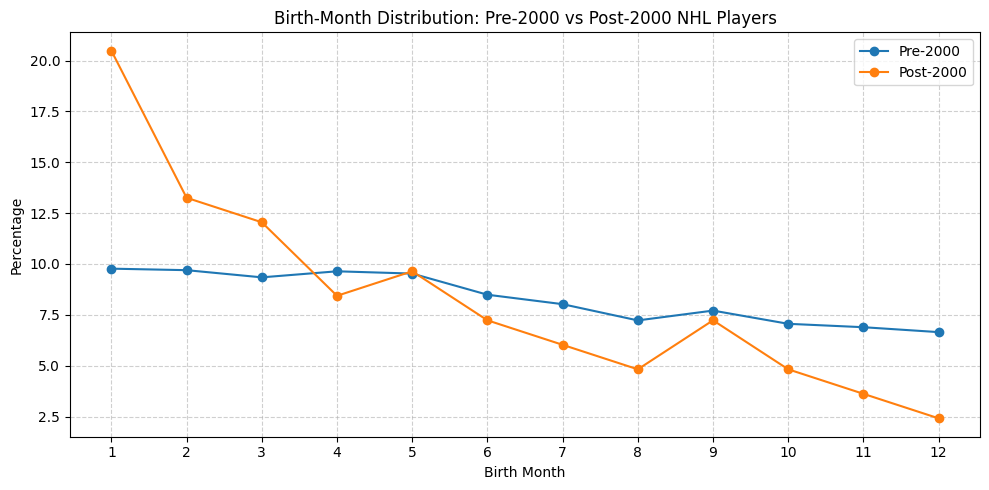

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(months, pre_2000_pct.values, marker='o', label='Pre-2000')
plt.plot(months, post_2000_pct.values, marker='o', label='Post-2000')

plt.xlabel('Birth Month')
plt.ylabel('Percentage')
plt.title('Birth-Month Distribution: Pre-2000 vs Post-2000 NHL Players')
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
